# 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = 'dark')
#white, dark, whitegrid, darkgrid, ticks

import sklearn as svm

import warnings
warnings.filterwarnings('ignore')

In [2]:
card_Df = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/SVM Classification/datasets_249595_524945_UniversalBank.csv")
card = card_Df.copy()
card_Df = card_Df.set_index('ID')
card_Df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
card_Df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Binary Classification Problem

In [4]:
for i in card_Df.columns:
    if card_Df[i].nunique() <= 5:
        print(card_Df[i].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [5]:
card_Df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
card_Df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Feature Engineering

Convert continuous variables `Age` and `ZiP Code` to 10 Categorical/Ordinal Values, it makes analysis and visualization easy to accomplish withoud discarding the features'Importance. 

In [7]:
## Bin Age and Zip Code
card_Df['ZIP Code'] = pd.qcut(card_Df['ZIP Code'], 10)

card_Df['Age'] = pd.qcut(card_Df['Age'], 10)

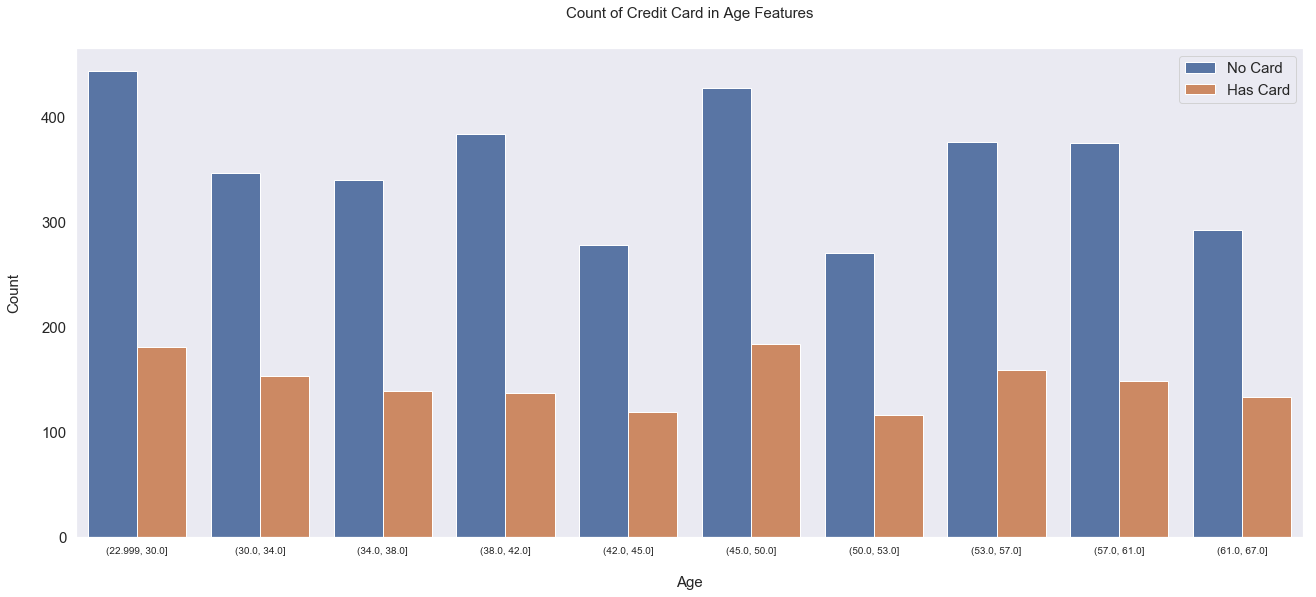

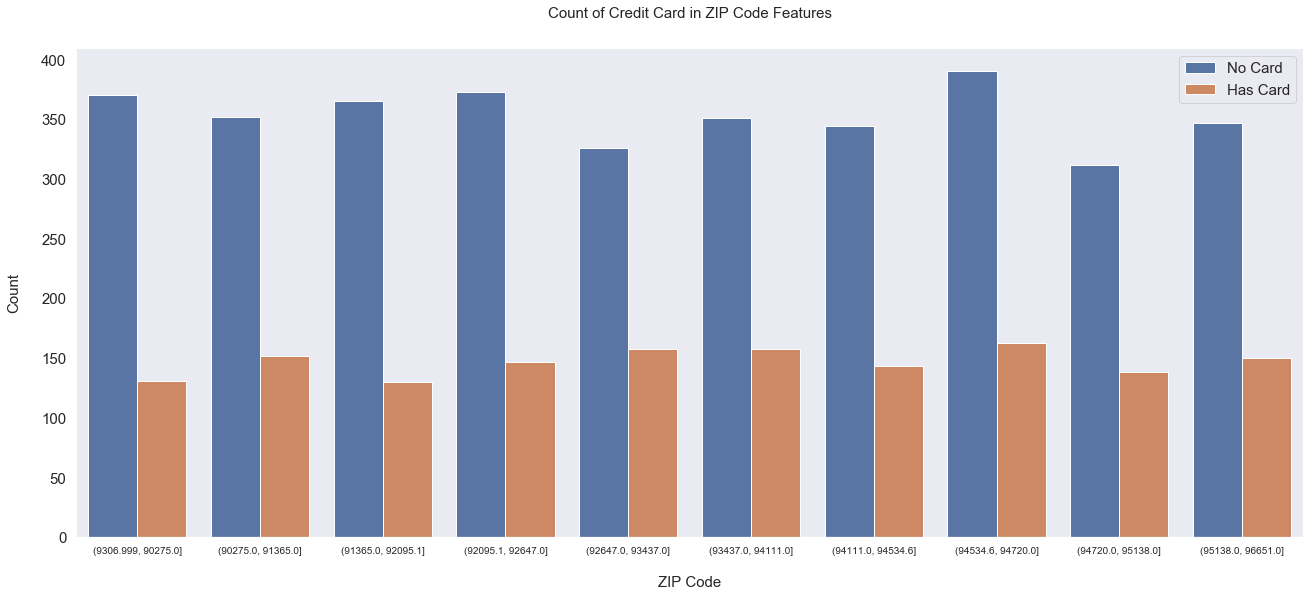

In [8]:
feats = ['Age', 'ZIP Code']

for i in feats:
    fig, axs = plt.subplots(figsize = (22, 9))
    sns.countplot(x = i, hue = 'CreditCard', data = card_Df)

    plt.xlabel(i, size = 15, labelpad = 20)
    plt.ylabel('Count', size=15, labelpad = 20)
    plt.tick_params(axis = 'x', labelsize = 10)
    plt.tick_params(axis = 'y', labelsize = 15)


    plt.legend(['No Card', 'Has Card'], loc = 'upper right', prop = {'size':15})
    plt.title('Count of Credit Card in {} Features'.format(i), size=15, y=1.05)

    plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

card_Df['Age'] = LabelEncoder().fit_transform(card_Df['Age'])
card_Df['ZIP Code'] = LabelEncoder().fit_transform(card_Df['ZIP Code'])

In [10]:
# Discarding Zero values
card_Df['Age'] = card_Df['Age'] + 1

card_Df['ZIP Code'] = card_Df['ZIP Code'] + 1

In [11]:
card_Df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,1,1,49,2,4,1.6,1,0,0,1,0,0,0
2,5,19,34,1,3,1.5,1,0,0,1,0,0,0
3,4,15,11,8,1,1.0,1,0,0,0,0,0,0
4,3,9,100,7,1,2.7,2,0,0,0,0,0,0
5,3,8,45,2,4,1.0,2,0,0,0,0,0,1


In [12]:
## Correlations

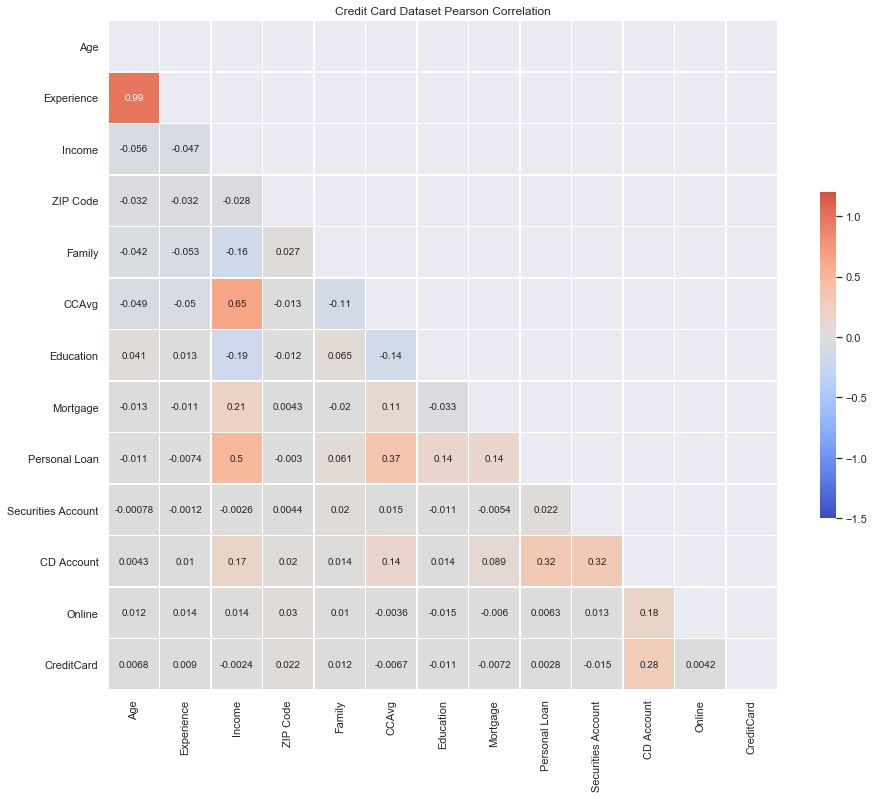

In [13]:
# Heatmap
card_corr = card_Df.corr(method = 'pearson')

f, ax = plt.subplots(figsize = (15, 30))

mask = np.zeros_like(card_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(card_corr, mask = mask, center = 0, 
            square = True, linewidths = .5, cbar_kws = {"shrink":.2}, 
            vmin = -1.5, vmax = 1.2, cmap = 'coolwarm', annot = True)
plt.title("Credit Card Dataset Pearson Correlation" )
plt.show()

This heatmap, shows us the relationship between our features, we may find some strange insights in it, for example one would expect `Income` but that barely correlate positively. However we see that `Experience` and `Age` correlate quite effectively. The next step is to now see in a partial graph, the relationship between the Features and the Target Variable.

In [14]:
X = card_Df.drop(columns = 'CreditCard')
y = card_Df['CreditCard']

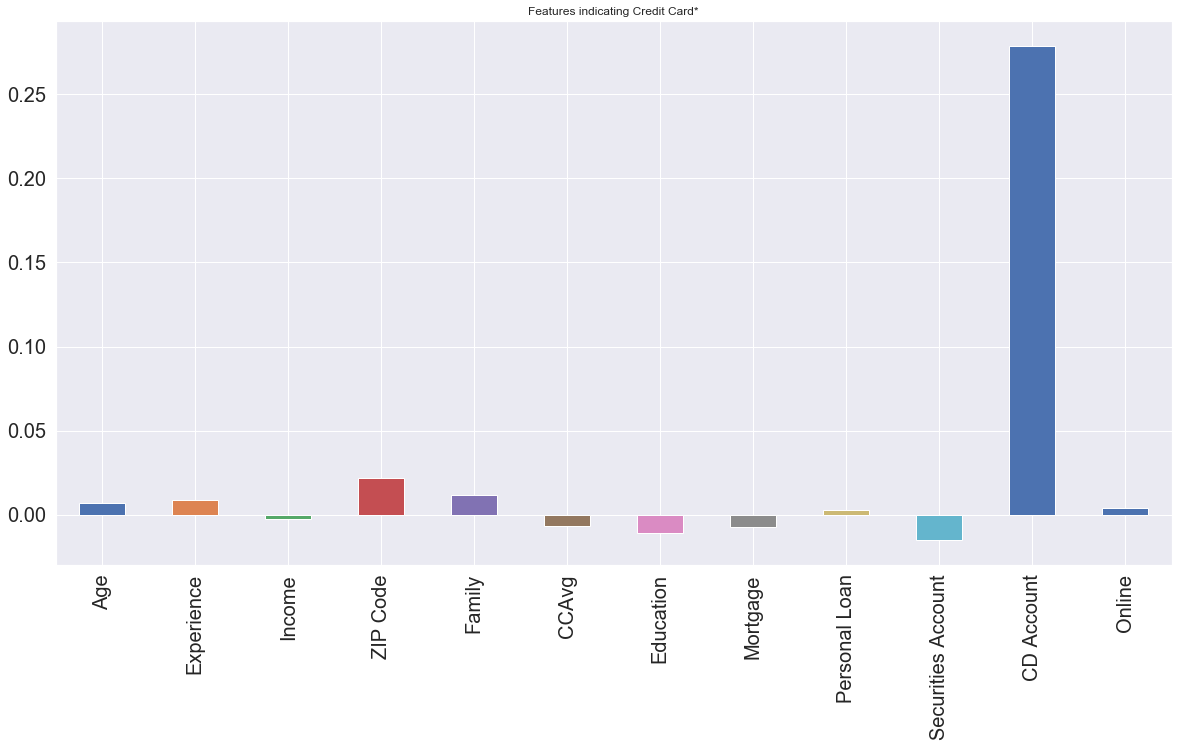

In [15]:
X.corrwith(y).plot.bar(figsize = (20, 10),
                                          title = "Features indicating Credit Card*",
                                          fontsize = 20, rot = 90, grid = True)
plt.show()

From the Above, we can see the varying contribution of influence by the `features`, we can determine that the significance of `CD Account` can create bias in our modelling, and will be our first sign for `Overfitting`.

## APPLYING MODELS

### Split Data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size = 0.25, random_state = 1)

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
anova_filter = SelectKBest(f_regression, k=5)
clf = SVC(kernel='linear')
anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
anova_svm.set_params(anova__k=10, svc__C=.1).fit(X_train, y_train)
prediction = anova_svm.predict(X_val)
anova_svm.score(X_train, y_train)          

0.7394666666666667

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

In [27]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', 
                                        multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, 
                                 scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: [mean]%f [std](%f)' % (name, cv_results.mean(), cv_results.std()))

LR: [mean]0.739470 [std](0.005145)
LDA: [mean]0.739470 [std](0.005145)
KNN: [mean]0.689356 [std](0.023857)
CART: [mean]0.619199 [std](0.018538)
NB: [mean]0.739470 [std](0.005145)
SVM: [mean]0.742670 [std](0.006172)


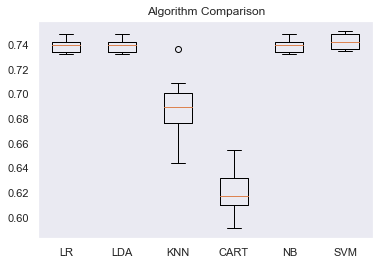

In [28]:
## Compare Algorithm
plt.boxplot(results, labels = names)
plt.title('Algorithm Comparison')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

LDA = LinearDiscriminantAnalysis()

parameter_grid = {'solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(LDA, param_grid = parameter_grid,
                          cv = kfold, scoring = 'roc_auc')


grid_search.fit(X_train, y_train)

print("Best Score: {:.5f}".format(grid_search.best_score_))
print("Best Parameters: {}".format(grid_search.best_params_))

Best Score: 0.61173
Best Parameters: {'solver': 'svd'}


In [30]:
LDA = LinearDiscriminantAnalysis(solver = 'svd')

LDA.fit(X_train, y_train)

predictions = LDA.predict(X_val)

In [31]:
## EVALUATION

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [33]:
print(accuracy_score(y_val, predictions), '\n')
print(confusion_matrix(y_val, predictions), '\n')
print(classification_report(y_val, predictions))

0.748 

[[878  17]
 [298  57]] 

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       895
           1       0.77      0.16      0.27       355

   micro avg       0.75      0.75      0.75      1250
   macro avg       0.76      0.57      0.56      1250
weighted avg       0.75      0.75      0.68      1250



In [ ]:
Our model is not that efficient in predicting Credit Cards, ..